In [53]:
#Importing the initial required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Loading the dataset
reviews= pd.read_csv('skytrax_reviews.csv',index_col=0)

In [55]:
#First few rows
reviews.head()

,exp_in_breif,overall,Name,Trip_Verified,content,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,...,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Airline,Year_Flown,Month_Flown,stops
0,"""This has been a total nightmare""",1,V Darkana,✅ Trip Verified,My flight was scheduled on July 4 2021 Sunda...,NaN,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,...,1.0,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0
1,"""beyond appalled by this experience""",1,Bishop Jermaine Moore Sr.,Not Verified,United Airlines have successfully and repetit...,NaN,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,...,1.0,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0
2,"""Both segments were awful""",1,J Parcell,✅ Trip Verified,Both segments were awful. The single agent f...,NaN,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,July,0.0
3,"""never fly through this airline again""",1,S Laytan,✅ Trip Verified,We reviewed the dimensions and the sizes on ...,NaN,Family Leisure,Economy Class,Pasco to Miami,Jun-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,June,0.0
4,"""fly other airlines in the future""",1,Nancy S Giannetta,✅ Trip Verified,So as I boarded I ask for help putting my ca...,Boeing 737,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,...,5.0,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0


In [56]:
reviews.shape

(10509, 22)

As the data was scrapped from web, some of the column names are not much meaningful. let us make more meaningful and format all names in same order

In [58]:
reviews.rename(columns={
    'exp_in_breif': 'Experience_Summary',
    'overall': 'Overall_Rating',
    'Name': 'Customer_Name',
    'Trip_Verified': 'Trip_Verified',
    'content': 'Experience_Detail',
    'Aircraft': 'Aircraft_Type',
    'Type Of Traveller': 'Traveller_Type',
    'Seat Type': 'Seat_Type',
    'Route': 'Flight_Route',
    'Date Flown': 'Flight_Date',
    'Seat Comfort': 'Seat_Comfort',
    'Cabin Staff Service': 'Cabin_Staff_Service',
    'Ground Service': 'Ground_Service',
    'Value For Money': 'Value_for_Money',
    'Recommended': 'Recommended',
    'Food & Beverages': 'Food_and_Beverages',
    'Inflight Entertainment': 'Inflight_Entertainment',
    'Wifi & Connectivity': 'WiFi_and_Connectivity',
    'Airline': 'Airline_Name',
    'Year_Flown': 'Year_Flown',
    'Month_Flown': 'Month_Flown',
    'stops': 'Number_of_Stops'
}
,inplace=True)

In [59]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Aircraft_Type', 'Traveller_Type',
       'Seat_Type', 'Flight_Route', 'Flight_Date', 'Seat_Comfort',
       'Cabin_Staff_Service', 'Ground_Service', 'Value_for_Money',
       'Recommended', 'Food_and_Beverages', 'Inflight_Entertainment',
       'WiFi_and_Connectivity', 'Airline_Name', 'Year_Flown', 'Month_Flown',
       'Number_of_Stops'],
      dtype='object')

In [60]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10509 entries, 0 to 10508
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experience_Summary      10509 non-null  object 
 1   Overall_Rating          10509 non-null  int64  
 2   Customer_Name           10509 non-null  object 
 3   Trip_Verified           10509 non-null  object 
 4   Experience_Detail       10509 non-null  object 
 5   Aircraft_Type           1352 non-null   object 
 6   Traveller_Type          10509 non-null  object 
 7   Seat_Type               10509 non-null  object 
 8   Flight_Route            10350 non-null  object 
 9   Flight_Date             10509 non-null  object 
 10  Seat_Comfort            9493 non-null   float64
 11  Cabin_Staff_Service     9416 non-null   float64
 12  Ground_Service          9976 non-null   float64
 13  Value_for_Money         10507 non-null  float64
 14  Recommended             10509 non-null  obj

In [61]:
reviews.describe()

,Overall_Rating,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_for_Money,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Year_Flown,Number_of_Stops
count,10509.000000,9493.000000,9416.000000,9976.000000,10507.000000,6042.000000,5431.000000,5280.000000,10509.000000,10350.000000
mean,2.061090,1.847045,2.107901,1.618184,1.578947,1.755214,1.856748,1.686742,2021.959654,0.175652
std,2.384699,1.216975,1.426640,1.233397,1.156071,1.225249,1.350571,1.242357,1.067787,0.390072
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,0.000000
75%,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2023.000000,0.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2024.000000,2.000000


DATA PREPARATION

In [63]:
#Below code removes trailing and leading spaces
reviews= reviews.apply(lambda x: x.strip() if isinstance(x,str) else x)

In [64]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Aircraft_Type,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,...,Ground_Service,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops
0,"""This has been a total nightmare""",1,V Darkana,✅ Trip Verified,My flight was scheduled on July 4 2021 Sunda...,NaN,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,...,1.0,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0
1,"""beyond appalled by this experience""",1,Bishop Jermaine Moore Sr.,Not Verified,United Airlines have successfully and repetit...,NaN,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,...,1.0,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0
2,"""Both segments were awful""",1,J Parcell,✅ Trip Verified,Both segments were awful. The single agent f...,NaN,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,July,0.0
3,"""never fly through this airline again""",1,S Laytan,✅ Trip Verified,We reviewed the dimensions and the sizes on ...,NaN,Family Leisure,Economy Class,Pasco to Miami,Jun-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,June,0.0
4,"""fly other airlines in the future""",1,Nancy S Giannetta,✅ Trip Verified,So as I boarded I ask for help putting my ca...,Boeing 737,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,...,5.0,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0


In [65]:
reviews['Experience_Summary']=reviews['Experience_Summary'].str.replace('"','')

In [66]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Aircraft_Type,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,...,Ground_Service,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops
0,This has been a total nightmare,1,V Darkana,✅ Trip Verified,My flight was scheduled on July 4 2021 Sunda...,NaN,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,...,1.0,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,Not Verified,United Airlines have successfully and repetit...,NaN,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,...,1.0,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0
2,Both segments were awful,1,J Parcell,✅ Trip Verified,Both segments were awful. The single agent f...,NaN,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,July,0.0
3,never fly through this airline again,1,S Laytan,✅ Trip Verified,We reviewed the dimensions and the sizes on ...,NaN,Family Leisure,Economy Class,Pasco to Miami,Jun-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,June,0.0
4,fly other airlines in the future,1,Nancy S Giannetta,✅ Trip Verified,So as I boarded I ask for help putting my ca...,Boeing 737,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,...,5.0,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0


In [67]:
reviews['Trip_Verified'].value_counts()

Trip_Verified
✅ Trip Verified          5829
Not Verified             4659
Nan                        18
#9989; Trip Verified        1
c✅ Trip Verified            1
<✅ Trip Verified            1
Name: count, dtype: int64

In [68]:
def replace_verification(text):
    x= str(text)

    if x=="Not Verified ":
        return 0
    elif x=="Nan":     
        return np.nan
    else:
        return 1
    

In [69]:
reviews['Trip_Verified']=reviews['Trip_Verified'].apply(replace_verification)

In [70]:
reviews['Trip_Verified'].value_counts()

Trip_Verified
1.0    5832
0.0    4659
Name: count, dtype: int64

In [71]:
reviews['Trip_Verified'].isna().sum()

18

In [72]:
#let us view first few records again
reviews.head(10)

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Aircraft_Type,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,...,Ground_Service,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,NaN,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,...,1.0,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,NaN,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,...,1.0,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,NaN,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,July,0.0
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,NaN,Family Leisure,Economy Class,Pasco to Miami,Jun-21,...,1.0,1.0,no,NaN,NaN,NaN,United Airlines,2021,June,0.0
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Boeing 737,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,...,5.0,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0
5,did an excellent job,10,Khaled Ibrahim,0.0,An employee who works at IAH terminal C Unite...,NaN,Family Leisure,Economy Class,Houston to Madrid,Oct-22,...,5.0,4.0,yes,3.0,3.0,3.0,United Airlines,2022,October,0.0
6,avoid United Airlines at all costs,1,Enrique Foppoli,1.0,Worst experience ever. At Lisbon we were tol...,NaN,Solo Leisure,Economy Class,Lisbon to Washington,Aug-22,...,1.0,1.0,no,1.0,1.0,1.0,United Airlines,2022,August,0.0
7,certainly will never fly it again,1,Andrew Ladner,0.0,"I was sold in economy ticket, and this comes...",NaN,Couple Leisure,Economy Class,Newark to Miami,Oct-20,...,2.0,1.0,no,1.0,3.0,1.0,United Airlines,2020,October,0.0
8,I'll never fly United Airlines,1,Uly Mueller,1.0,My flight was booked with rewards miles and ...,NaN,Couple Leisure,Economy Class,Toronto to Denver,Dec-22,...,NaN,1.0,no,NaN,NaN,NaN,United Airlines,2022,December,0.0
9,completely disgusted with this airline,3,Kevin Parr,1.0,I typically fly economy plus or first. I had...,NaN,Business,Economy Class,Boston to Newark,May-23,...,3.0,2.0,no,2.0,2.0,1.0,United Airlines,2023,May,0.0


Data Formatting looks good. Let us check for missing values now.

In [74]:
missing_columns=pd.DataFrame(reviews.isna().sum()).reset_index()
missing_columns.columns=['column_name','missing_values']


In [75]:
missing_columns[missing_columns['missing_values']>0]

,column_name,missing_values
3,Trip_Verified,18
5,Aircraft_Type,9157
8,Flight_Route,159
10,Seat_Comfort,1016
11,Cabin_Staff_Service,1093
12,Ground_Service,533
13,Value_for_Money,2
15,Food_and_Beverages,4467
16,Inflight_Entertainment,5078
17,WiFi_and_Connectivity,5229


The above dataframe shows the columns that has missing values.

There are so many methods to impute them. Few of them are mean/median/mode imputation, random imputation, frequent category imputation, arbritary imputation.

let us not worry about the columns such as Aircraft_Type, Food and beverages, Inflight_Entertainment, Wifi and connectivity for now and focus on the imputation of the other columns.

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1352/3537644147.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['Trip_Verified'])


<Axes: xlabel='Trip_Verified', ylabel='Density'>

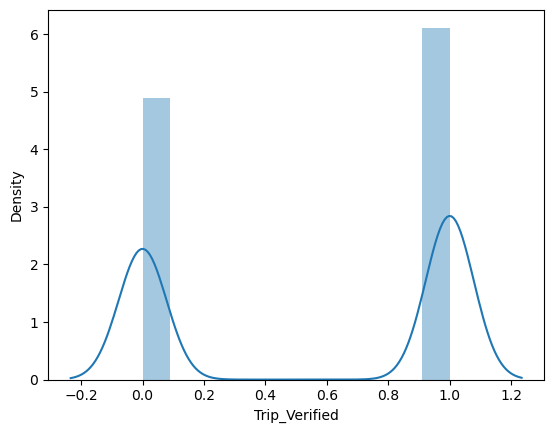

In [78]:
#visualize the trip verified
sns.distplot(reviews['Trip_Verified'])

In [79]:
def random_imputation(dataset,column):
    #create the sample that equals to the count of missing values
    sample= dataset[column].dropna().sample(dataset[column].isna().sum(),random_state=3008)
    missing_values= dataset[dataset[column].isna()]
    sample.index=missing_values.index
    dataset.loc[dataset[column].isna(),column]=sample

In [80]:
random_imputation_columns=['Trip_Verified','Flight_Route','Value_for_Money','Number_of_Stops','Ground_Service']

In [81]:
for column in random_imputation_columns:
    random_imputation(reviews,column)

In [82]:
reviews.isna().sum()

Experience_Summary           0
Overall_Rating               0
Customer_Name                0
Trip_Verified                0
Experience_Detail            0
Aircraft_Type             9157
Traveller_Type               0
Seat_Type                    0
Flight_Route                 0
Flight_Date                  0
Seat_Comfort              1016
Cabin_Staff_Service       1093
Ground_Service               0
Value_for_Money              0
Recommended                  0
Food_and_Beverages        4467
Inflight_Entertainment    5078
WiFi_and_Connectivity     5229
Airline_Name                 0
Year_Flown                   0
Month_Flown                  0
Number_of_Stops              0
dtype: int64

Aircraft_Type has almost 90 percent of null values, so we are going to ignore that or delete that column completely. 

Now let us see the relationship between other five columns and value_for_money column.

In [85]:
Target_based_imputation_columns=['Seat_Comfort','Cabin_Staff_Service','Food_and_Beverages','Inflight_Entertainment','WiFi_and_Connectivity']

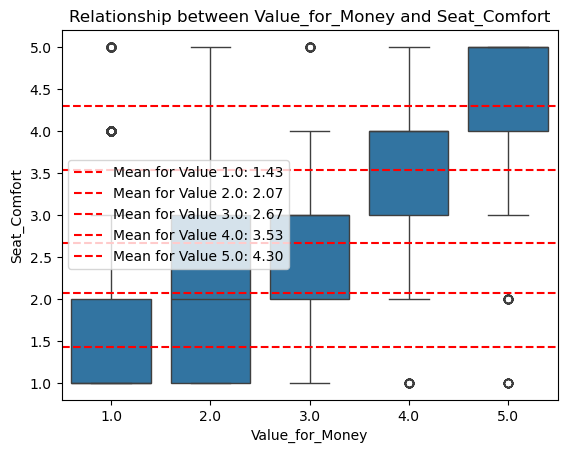

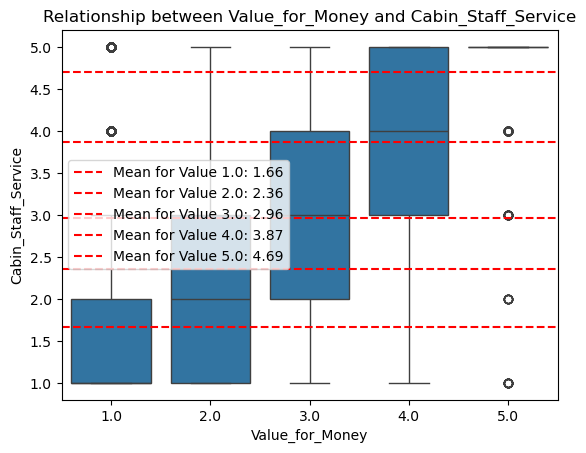

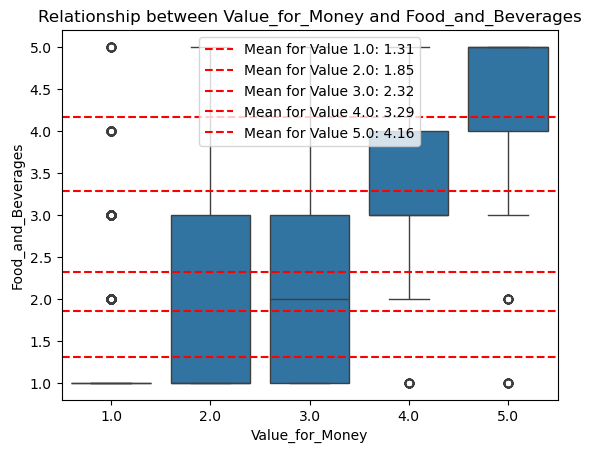

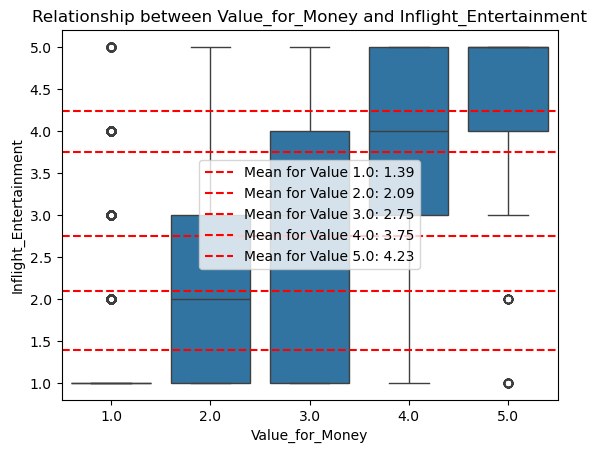

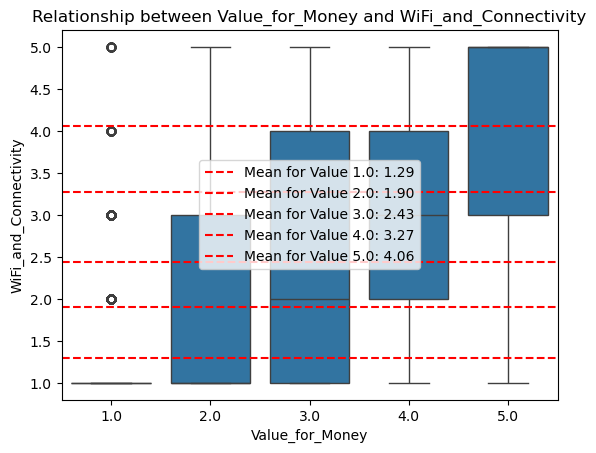

In [86]:
for each in Target_based_imputation_columns:
    plt.title(f'Relationship between Value_for_Money and {each}')
    sns.boxplot(x='Value_for_Money',y=each,data=reviews)
    mean_values = reviews.groupby('Value_for_Money')[each].mean()
    
    # Add a horizontal line for the mean
    for value, mean in mean_values.items():
        plt.axhline(mean, color='red', linestyle='--', label=f'Mean for Value {value}: {mean:.2f}')
    
    
    # Show the plot with labels
    plt.legend()
    plt.show()
    


Let us create a dictionary based on the above plots for each column.

In [88]:
Seat_Comfort_dict= {1:1,2:2,3:3,4:4,5:5}
Cabin_Staff_Service_dict={1:2,2:2,3:3,4:4,5:5}
Food_and_Beverages_dict={1:1,2:2,3:2,4:3,5:4}
Inflight_Entertainment_dict={1:1,2:2,3:3,4:4,5:4}
WiFi_and_Connectivity_dict={1:1,2:2,3:2,4:3,5:4}

In [98]:
for each in Target_based_imputation_columns:
#Seat_Comfort','Cabin_Staff_Service','Food_and_Beverages','Inflight_Entertainment','WiFi_and_Connectivity'
        dict1= each + "_dict"
        print(dict1)
        reviews[each] = reviews[each].fillna(
        reviews['Value_for_Money'].map(globals()[dict1])
    )
    

Seat_Comfort_dict
Cabin_Staff_Service_dict
Food_and_Beverages_dict
Inflight_Entertainment_dict
WiFi_and_Connectivity_dict


In [100]:
reviews.isna().sum()

Experience_Summary           0
Overall_Rating               0
Customer_Name                0
Trip_Verified                0
Experience_Detail            0
Aircraft_Type             9157
Traveller_Type               0
Seat_Type                    0
Flight_Route                 0
Flight_Date                  0
Seat_Comfort                 0
Cabin_Staff_Service          0
Ground_Service               0
Value_for_Money              0
Recommended                  0
Food_and_Beverages           0
Inflight_Entertainment       0
WiFi_and_Connectivity        0
Airline_Name                 0
Year_Flown                   0
Month_Flown                  0
Number_of_Stops              0
dtype: int64

In [102]:
#Drop the aircraft type column as it contains more than 90% missing values
reviews.drop(columns=['Aircraft_Type'],inplace=True)

In [104]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops'],
      dtype='object')

I just got an idea to add where the trip is domestic or international.let us do that.

In [107]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from geopy.geocoders import Nominatim

def get_country_by_city(city_name):
    geolocator = Nominatim(user_agent="city-country-lookup")
    location = geolocator.geocode(city_name)
    if location:
        return location.address.split(',')[-1].strip()  # Country is usually the last element in the address
    return "Country not found"

city = "Paris"
country = get_country_by_city(city)
print(f"The city {city} is located in {country}")


In [ ]:
def get_country_by_city(city_name):
    geolocator = Nominatim(user_agent="city-country-lookup")
    location = geolocator.geocode(city_name)
    if location:
        return location.address.split(',')[-1].strip()  # Country is usually the last element in the address
    return "Country not found"

city = "Paris"
country = get_country_by_city(city)
print(f"The city {city} is located in {country}")

In [118]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderQueryError

In [120]:
def get_trip_type(text):
    print(text)
    geolocator = Nominatim(user_agent="city-country-lookup")
    try:
        if 'via' in text:
         split1=text.split('to')
         city_1=split1[0]
         split2=split1[1].split('via')
         city_2=split2[0]
         city_3=split2[1]
        
        else:
         split1=text.split('to')
         city_1=split1[0]
         city_2=split1[1]
    
    
        location_1 = geolocator.geocode(city_1)
        location_2 = geolocator.geocode(city_2)
        if location_1==location_2:
            return "Domestic"
        else:
            return "International"
    except (GeocoderTimedOut, GeocoderQueryError) as e:
        print(f"Geocoding error: {e}. Skipping this entry.")
        return None  # Or you can return a default value or message

    except Exception as e:
        print(f"Unexpected error: {e}. Skipping this entry.")

      
           
          
       


In [167]:
get_trip_type('Toronto to Denver')

Toronto to Denver
Geocoding error: Non-successful status code 400. Skipping this entry.


In [227]:
geolocator = Nominatim(user_agent="city-country-lookup")
k=geolocator.geocode('Denver')
k.address.split(',')[-1].strip()

'United States'

As records were large, I want to break the dataset into 5 parts and merge it.

In [129]:
reviews_1= reviews.iloc[0:2000,7:9].copy()
reviews_1.shape

(2000, 2)

In [131]:
reviews_1.head()

,Flight_Route,Flight_Date
0,Anchorage to San Francisco,Jul-21
1,Pittsburgh to Dubai via Newark,May-23
2,Montrose to Denver,Jul-21
3,Pasco to Miami,Jun-21
4,Chicago to Tampa,Apr-24


In [133]:
reviews_1['Type_of_Trip']=reviews_1['Flight_Route'].apply(get_trip_type)


Anchorage to San Francisco
Pittsburgh to Dubai via Newark
Montrose to Denver
Pasco to Miami
Chicago to Tampa
Houston to Madrid
Lisbon to Washington
Newark to Miami
Toronto to Denver
Geocoding error: Non-successful status code 400. Skipping this entry.
Boston to Newark
Chicago to Fort Lauderdale
Sydney to Los Angeles
San Francisco to Miami
Bogota to Houston
Houston to San Francisco
Newark to Charleston
Rochester to Chicago via South Bend
San Francisco to Washington
Omaha to Denver via Portland
Houston to Orlando
Montego Bay to Newark
Denver to London
Dallas to Spokane via Las Vegas
Denver to Phoenix
San Diego to Atlanta via Denver
San Francisco to Hong Kong
St. Thomas USVI to Vancouver British Columbia, Canada
Fort Myers to Rochester
Knoxville to Austin via Houston
Honolulu to San Francisco
Tampa to Los Angeles via Chicago O'Hare
Honolulu to San Francisco
San Francisco to Indianapolis
Atlanta to Houston
Fresno to Denver
San Francisco to Eugene
Midland to Houston
San Antonio, Texas to Or

In [135]:
reviews_2= reviews.iloc[2000:4000,7:9].copy()
reviews_2['Type_of_Trip']=reviews_2['Flight_Route'].apply(get_trip_type)

Austin to Boston
Newark to Chicago
New York to Delhi
Miami to Belize
Salt Lake city to Dallas
Norfolk to Miami
Albuquerque to Pittsburgh
Chattanooga to Charlotte
Oklahoma City to Las Vegas
Colorado Springs, Colorado to Jacksonville, Florida
Charlotte to Rome
Phoenix to Guadalajara
Boston to Salt Lake City
Los Angeles to Tokyo
Chicago to Aruba
Tampa to Phoenix
Columbia to Rhode Island via Washington
Atlanta to Dallas
Atlanta to Dallas Ft Worth
Toronto to Guadalajara
Geocoding error: Non-successful status code 400. Skipping this entry.
Boston to Hilton Head Island via Charlotte
Unexpected error: list index out of range. Skipping this entry.
Dallas Ft Worth to Alexandria
Detroit to Durango via Dallas
Rapid city to Lubbock via Dallas
London to Dallas
Manchester to Charlotte
Dallas to San Diego
New York to Amsterdam via London
Cabo to New Orleans via Dallas
Denver to Midland via Dallas
Portland to Dallas Ft Worth
Philadelphia to Savannah
Chicago to Washington DC
Charlotte to Baltimore
Honol

In [136]:
reviews_3= reviews.iloc[4000:8000,7:9].copy()
reviews_3['Type_of_Trip']=reviews_3['Flight_Route'].apply(get_trip_type)

New York to Detroit
Las Vegas to Chicago
Columbus to Sacramento
Las Vegas to Newark
Denver to Minneapolis
Milwaukee to Las Vegas
Santo Domingo to Baltimore
Los Angeles to Philadelphia
Tampa, Fl to Houston, Tx
Las Vegas to Charlotte
Los Angeles to Los Cabos
Charlotte to Orlando via Dallas
Las Vegas to San Diego
Oakland to Los Angeles
Los Angeles to Miami
Newark to Indianapolis
Las Vegas to Los Angeles
Los Angeles to Las Vegas
Fort Lauderdale to Indianapolis
Atlantic City to Fort Meyers
San Antonio to Orlando
Atlantic City to Orlando
Managua to Fort Lauderdale
Orlando to Houston
Fort Lauderdale to Chicago
Dallas to Las Vegas via Cleveland
Atlanta to Miami
Orlando to Atlanta via Detroit
Indianapolis to Fort Myers
Las Vegas to Kansas City
Pensacola to Orlando
Charlotte to San Diego via Las Vegas
Las Vegas to Kansas City
Fort Lauderdale to Chicago
Dallas to Las Vegas
Fort Lauderdale to Santiago
Austin to Newark
Houston to Las Vegas
Fort Myers to Las Vegas
Newark to Las vegas
Fort Lauderdale

In [147]:
reviews_4= reviews.iloc[8000:,7:9].copy()
reviews_4['Type_of_Trip']=reviews_4['Flight_Route'].apply(get_trip_type)

Ontario to Atlanta
Saint Louis to Punta Cana
Denver to Chicago via Atlanta
Philadelphia to San Juan
Portland to Phoenix
Orlando to Denver
Tampa to Buffalo
Orlando to Atlanta
Seattle to Las Vegas
Orlando to Nashville
Phoenix to Salt Lake City
Montego Bay to Atlanta
Nashville to Denver
Cleveland to Orlando
San Francisco to Ontario
Tampa to Cleveland
Las Vegas to Indianapolis
Punta Cana DR to Atlanta GA via Miami, FL.
Denver to Indianapolis
Cancun to Cincinnati via Orlando
Atlanta to Seattle
Cancun to Baltimore
Denver to Pensicola
Orlando to Las Vegas
Denver to San Diego
Phoenix to New Orleans
Orlando to Islip
Tampa to Buffalo
Santo Domingo to Orlando
Dallas Ft Worth to Chicago Midway
Miami to Atlanta
Las Vegas to Ft Lauderdale
Baltimore to Las Vegas
San Diego to Philadelphia via Las Vegas / Chicago
Houston to Las Vegas
Raleigh to San Juan
Detroit to Tampa
Minneapolis to San Diego via Denver
Baltimore to Las Vegas
St Louis to Cancun
Philadelphia, PA to Dallas, TX
Tampa to San Juan
Dallas/

In [153]:
review=pd.DataFrame(pd.concat([reviews_1['Type_of_Trip'],reviews_2['Type_of_Trip'],reviews_3['Type_of_Trip'],reviews_4['Type_of_Trip']]))
review.head()

,Type_of_Trip
0,International
1,International
2,International
3,International
4,International


In [155]:
review.shape

(10509, 1)

In [310]:
reviews=pd.concat([reviews,review],axis=1)
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Type_of_Trip
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0,International
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0,International
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,July,0.0,International
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,June,0.0,International
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0,International


In [312]:
reviews['Type_of_Trip'].value_counts()

Type_of_Trip
International    10021
Domestic             3
Name: count, dtype: int64

In [314]:
reviews['Type_of_Trip'].isna().sum()

485

In [316]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Type_of_Trip
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0,International
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0,International
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,July,0.0,International
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,June,0.0,International
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0,International


In [294]:
def get_trip_type2(text):
    print(text)
    geolocator = Nominatim(user_agent="city-country-lookup")
    try:
        if 'via' in text:
         print('hi1')
         split1=text.split(' to')
         city_1=split1[0]
         split2=split1[1].split('via')
         city_2=split2[0]
         city_3=split2[1]
        
        else:
         print('hi2')
         split1=text.split(' to')
         city_1=split1[0]
         city_2=split1[1]
    
        print(city_1)
        print(city_2)
        location_1 = geolocator.geocode(city_1)
        location_2 = geolocator.geocode(city_2)
        print(location_1.address.split(',')[-1].strip())
        print(location_2.address.split(',')[-1].strip())
        if location_1.address.split(',')[-1].strip()==location_2.address.split(',')[-1].strip():
            return "Domestic"
        else:
            return "International"
    except (GeocoderTimedOut, GeocoderQueryError) as e:
        print(f"Geocoding error: {e}. Skipping this entry.")
        return None  # Or you can return a default value or message

    except Exception as e:
        print(f"Unexpected error: {e}. Skipping this entry.")

In [334]:
def null_replace(args):
    #print('hi')
    #print(args)
    if pd.isna(args[1]):
        return get_trip_type2(args[0])
    else:
        return args[1]
        


In [336]:
reviews['Trip_Type']=reviews[['Flight_Route','Type_of_Trip']].apply(null_replace,axis=1)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1352/4247145669.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(args[1]):
/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1352/4247145669.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return args[1]
/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1352/4247145669.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return get_trip_typ

Toronto to Denver
hi2
Toronto
 Denver
Canada
United States
Washington to Puerto Plate via Newark
hi1
Washington
 Puerto Plate 
United States
Unexpected error: 'NoneType' object has no attribute 'address'. Skipping this entry.
Santo Domingo to Providence via Newark
hi1
Santo Domingo
 Providence 
República Dominicana
United States
Guam to Boston via Honolulu
hi1
Guam
 Boston 
United States
United States
Las Vega to San Antonio via Houston
hi1
Las Vega
 San Antonio 
España
United States
Denver to San Antonio via Las Vegas
hi1
Denver
 San Antonio 
United States
United States
Charleston to Tokyo via Dallas
hi1
Charleston
 Tokyo 
United States
日本
Singapore to Washington via San Francisco
hi1
Singapore
 Washington 
Singapore
United States
Washington to Buenos Aires via Houston
hi1
Washington
 Buenos Aires 
United States
Argentina
Toronto to Houston
hi2
Toronto
 Houston
Canada
United States
Portland to Denver to Mexico via Houston
hi1
Unexpected error: list index out of range. Skipping this en

In [340]:
reviews[reviews['Trip_Type'].isna()]

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Type_of_Trip,Trip_Type
48,Terrible company,1,Maria Scaggs,1.0,I purchased 4 tickets to the Dominican Repub...,Family Leisure,Economy Class,Washington to Puerto Plate via Newark,Mar-20,1.0,...,no,1.0,1.0,1.0,United Airlines,2020,March,1.0,None,None
182,Give poor excuses over and over,2,Luis Tello,0.0,"United cancel flights, Change schedules, Giv...",Business,Business Class,Portland to Denver to Mexico via Houston,Aug-21,3.0,...,no,2.0,5.0,2.0,United Airlines,2021,August,1.0,None,None
401,Choose another airline,1,H Lang,1.0,Did not honor seating request (purchased add...,Solo Leisure,Economy Class,San Francisco via Chicago,Apr-23,1.0,...,no,1.0,2.0,2.0,United Airlines,2023,April,1.0,None,None
443,"my first, and last, flying United",1,H Johnson,1.0,"Worst airline ever! Rude staff, unorganized. ...",Business,Economy Class,Idaho Falls to Denver to Denver to Newark via ...,May-23,3.0,...,no,1.0,1.0,1.0,United Airlines,2023,May,1.0,None,None
1655,Worst experience ever,1,H Waldan,1.0,"Worst experience ever, a two hour flight was...",Couple Leisure,Economy Class,Washington to via Tampa,Jun-21,1.0,...,no,1.0,1.0,1.0,American Airlines,2021,June,1.0,None,None
2259,unhelpful and uncompassionate,1,M Walden,1.0,Due to your customer service being unhelpful...,Solo Leisure,Economy Class,Atlanta to Detroit to via Washington,Feb-22,2.0,...,no,1.0,1.0,1.0,American Airlines,2022,February,1.0,None,None
2816,Never again American Airlines,1,Diana Gallagher,1.0,It was bad enough when my original outgoing ...,Solo Leisure,Economy Class,Yuma to to Kansas City via Dallas,Feb-22,1.0,...,no,1.0,1.0,1.0,American Airlines,2022,February,1.0,None,None
3535,Be very careful flying with Spirit internation...,1,D Saunders,1.0,Be very careful flying with Spirit internatio...,Solo Leisure,Economy Class,"Fort Lauderdale to Panama City, Panama",Dec-20,1.0,...,no,1.0,1.0,1.0,Spirit Airlines,2020,December,0.0,None,None
5045,It was seriously a nightmare,1,J Bower,0.0,Orlando via Richmond. The flight to Orlando ...,Family Leisure,Economy Class,Orlando via Richmond,Feb-20,3.0,...,no,2.0,2.0,2.0,Spirit Airlines,2020,February,1.0,None,None
5265,"Poor planning, horrible customer service",1,Mechelle Roy,1.0,By far the worst airline and service. We flew...,Family Leisure,Economy Class,Sandford Orlando to Plattsburg,Feb-23,1.0,...,no,1.0,1.0,1.0,Allegiant Air Airlines,2023,February,0.0,None,None


In [342]:
#lets do random imputation
random_imputation(reviews,'Trip_Type')

In [344]:
reviews.isna().sum()

Experience_Summary          0
Overall_Rating              0
Customer_Name               0
Trip_Verified               0
Experience_Detail           0
Traveller_Type              0
Seat_Type                   0
Flight_Route                0
Flight_Date                 0
Seat_Comfort                0
Cabin_Staff_Service         0
Ground_Service              0
Value_for_Money             0
Recommended                 0
Food_and_Beverages          0
Inflight_Entertainment      0
WiFi_and_Connectivity       0
Airline_Name                0
Year_Flown                  0
Month_Flown                 0
Number_of_Stops             0
Type_of_Trip              485
Trip_Type                   0
dtype: int64

In [346]:
reviews.drop(columns='Type_of_Trip',inplace=True)

In [348]:
reviews.to_csv('reviews_cleaned.csv')